In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Combine Prediction Probabilities

In [10]:
df = pd.read_csv('../data/corpus/reserved_test_pred.csv')

In [11]:
# Map probability column names to true labels
prob_to_label = {
    "Science_Fiction_Prob": "Science Fiction & Fantasy",
    "Romance_Prob": "Romance",
    "Mystery_Prob": "Mystery, Thriller & Suspense",
    "History_Prob": "History",
    "Business_Prob": "Business & Careers",
    "Biographies_Prob": "Biographies & Memoirs"
}

In [12]:
# Define the best thresholds for each model
best_thresholds = {
    "Science_Fiction_Prob": 0.48,
    "Romance_Prob": 0.45,
    "Mystery_Prob": 0.55,
    "History_Prob": 0.47,
    "Business_Prob": 0.5,
    "Biographies_Prob": 0.49
}

# Normalize probabilities by their thresholds
normalized_probs = {
    col: df[col] / best_thresholds[col] for col in best_thresholds
}

In [13]:
# Create a DataFrame of normalized probabilities
normalized_df = pd.DataFrame(normalized_probs)

# Determine the predicted label based on the highest normalized probability
df['predicted_label'] = normalized_df.idxmax(axis=1).map(prob_to_label)

In [14]:
# Check if prediction is correct
df['is_correct'] = df['predicted_label'] == df['label']

In [15]:
# Calculate accuracy for each genre
accuracy_by_genre = df.groupby('label')['is_correct'].mean() * 100

# Display the accuracy for each genre
print("Accuracy by Genre:")
print(accuracy_by_genre)

Accuracy by Genre:
label
Biographies & Memoirs           12.000000
Business & Careers              60.000000
History                         60.000000
Mystery, Thriller & Suspense    42.857143
Romance                         55.000000
Science Fiction & Fantasy       28.571429
Name: is_correct, dtype: float64


## Cross-Genre Evaluation

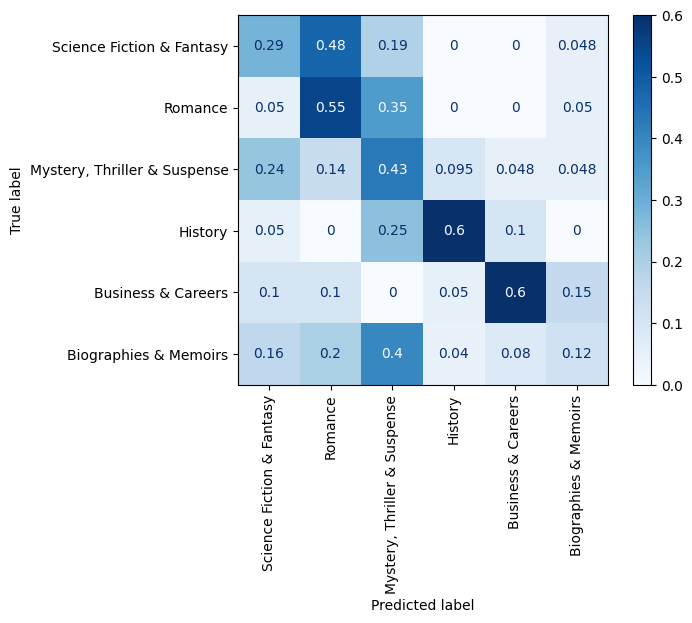

In [45]:
# Generate the confusion matrix
labels = list(prob_to_label.values())  # Ensure correct order of genres
cm = confusion_matrix(df['label'], df['predicted_label'], labels=labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=labels)
disp.plot(cmap="Blues", xticks_rotation='vertical')


In [21]:
# Normalize confusion matrix by rows (actual genres)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Display misclassification rates
misclassification_rates = pd.DataFrame(cm_normalized, index=labels, columns=labels)
misclassification_rates

,Science Fiction & Fantasy,Romance,"Mystery, Thriller & Suspense",History,Business & Careers,Biographies & Memoirs
Science Fiction & Fantasy,0.285714,0.476190,0.190476,0.000000,0.000000,0.047619
Romance,0.050000,0.550000,0.350000,0.000000,0.000000,0.050000
"Mystery, Thriller & Suspense",0.238095,0.142857,0.428571,0.095238,0.047619,0.047619
History,0.050000,0.000000,0.250000,0.600000,0.100000,0.000000
Business & Careers,0.100000,0.100000,0.000000,0.050000,0.600000,0.150000
Biographies & Memoirs,0.160000,0.200000,0.400000,0.040000,0.080000,0.120000


## Prediction Probability vs Accuracy

In [30]:
# Add a column for the maximum (normalized) probability for each prediction
df['max_normalized_prob'] = normalized_df.max(axis=1)

# Group by probability bins and calculate accuracy
probability_bins = pd.cut(df['max_normalized_prob'], np.linspace(0, 2, 21))
accuracy_by_bin = df.groupby(probability_bins)['is_correct'].mean() * 100

# Display accuracy by probability bin
print("Accuracy by Probability Bin:")
print(accuracy_by_bin)


Accuracy by Probability Bin:
max_normalized_prob
(0.0, 0.1]           NaN
(0.1, 0.2]           NaN
(0.2, 0.3]           NaN
(0.3, 0.4]           NaN
(0.4, 0.5]           NaN
(0.5, 0.6]           NaN
(0.6, 0.7]           NaN
(0.7, 0.8]           NaN
(0.8, 0.9]      0.000000
(0.9, 1.0]      0.000000
(1.0, 1.1]     50.000000
(1.1, 1.2]     47.058824
(1.2, 1.3]     28.000000
(1.3, 1.4]     31.818182
(1.4, 1.5]     50.000000
(1.5, 1.6]     47.619048
(1.6, 1.7]     53.846154
(1.7, 1.8]     50.000000
(1.8, 1.9]     50.000000
(1.9, 2.0]    100.000000
Name: is_correct, dtype: float64


/var/folders/3f/2_syl7793_j_c413yxmzlq980000gn/T/ipykernel_29500/115696989.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accuracy_by_bin = df.groupby(probability_bins)['is_correct'].mean() * 100


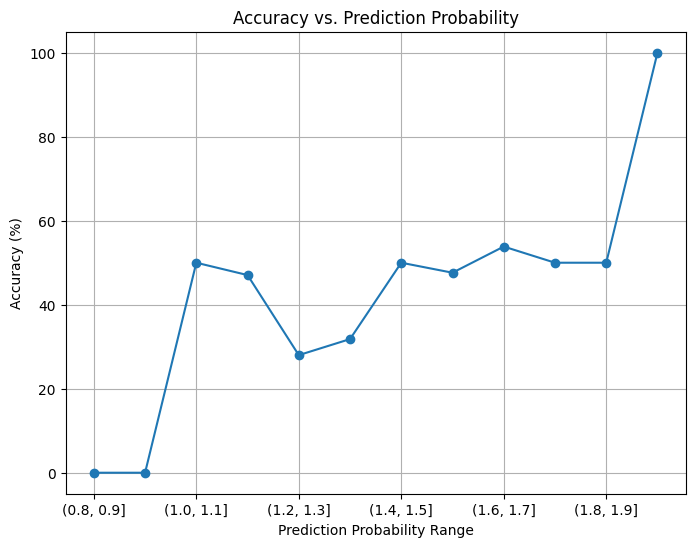

In [31]:
# Plot accuracy by probability bin
accuracy_by_bin.plot(kind='line', marker='o', figsize=(8, 6))
plt.title("Accuracy vs. Prediction Probability")
plt.xlabel("Prediction Probability Range")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

## Compare Accuracy Among Genres

In [36]:
# Recordeed each genre threshold results
data = {
    "Genre": ["Science Fiction & Fantasy", "Romance", "Mystery, Thriller & Suspense", "History", "Business & Careers", "Biographies & Memoirs"],
    "Default Threshold": [0.74, 0.81, 0.69, 0.89, 0.94, 0.72],  
    "Best Threshold": [0.79, 0.87, 0.74, 0.91, 0.94, 0.74]      
}

# Convert to DataFrame
df_accuracy = pd.DataFrame(data)

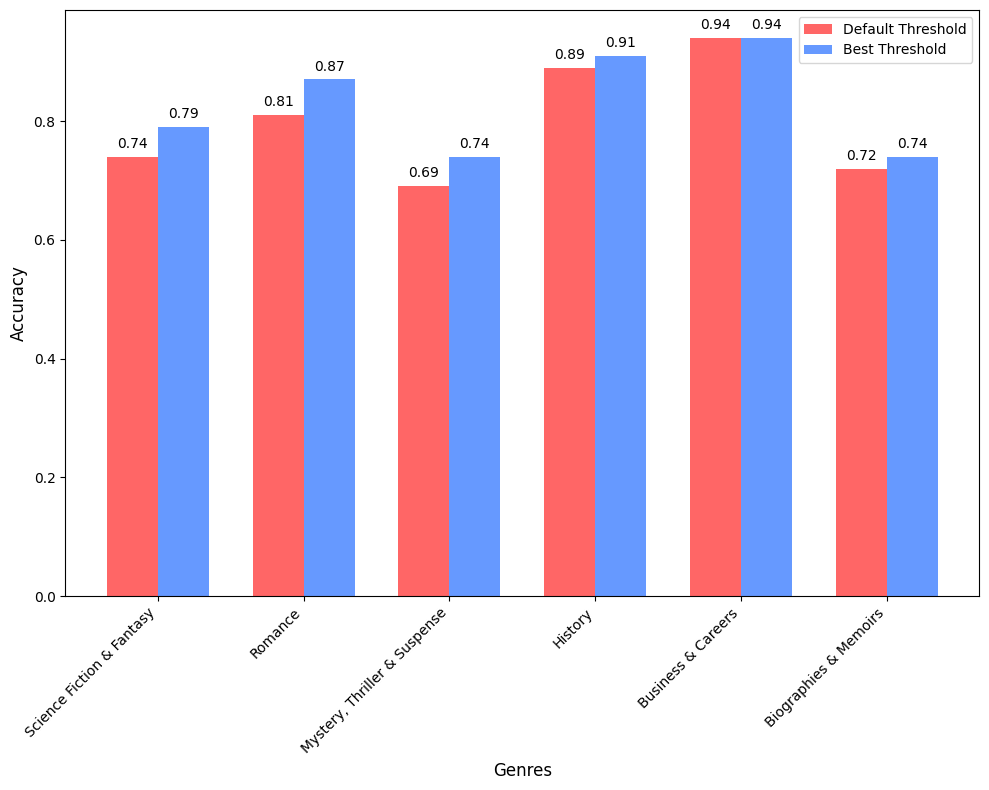

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.35
x = range(len(df_accuracy["Genre"]))

# Create bars for Default Threshold and Best Threshold
bars1 = ax.bar(x, df_accuracy["Default Threshold"], width=bar_width, color = '#FF6666', label="Default Threshold", align='center')
bars2 = ax.bar([p + bar_width for p in x], df_accuracy["Best Threshold"], width=bar_width, color = "#6699FF", label="Best Threshold", align='center')

# Add values on top of each bar
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f"{height:.2f}", ha='center', va='bottom', fontsize=10, color='black')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f"{height:.2f}", ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
ax.set_xlabel("Genres", fontsize = 12)
ax.set_ylabel("Accuracy", fontsize = 12)
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(df_accuracy["Genre"], rotation=45, ha="right", fontsize = 10)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()